<a href="https://colab.research.google.com/github/HanYang-AI/HYAI/blob/main/3_Suppoort_Vector_Machine_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/NBA Hall of Famers 2021.csv")

In [ ]:
df.head()

,Name,position,All_star_selections,In_Hall_of_fame,height,weight,born
0,Larry Foust,C,8,0,206,97,1928
1,Brad Daugherty,C,5,0,213,111,1965
2,Bill Laimbeer,C,4,0,211,111,1957
3,Red Kerr,C,3,0,206,104,1932
4,Red Rocha,C,2,0,206,83,1923


In [ ]:
x1 = df.loc[df.position == "C"]
x2 = df.loc[df.position == "G"]

In [ ]:
new_df = pd.concat([x1, x2], axis=0)

In [ ]:
new_df.position.value_counts()

G    181
C     76
Name: position, dtype: int64

In [ ]:
new_df.loc[:, ["position", "height", "weight"]]

,position,height,weight
0,C,206,97
1,C,213,111
2,C,211,111
3,C,206,104
4,C,206,83
...,...,...,...
433,G,188,84
434,G,190,86
435,G,193,92
436,G,196,85


In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', C=0.01)

In [ ]:
svc.fit(X=new_df.loc[:, ["height", "weight"]], y=new_df.loc[:, "position"])

SVC(C=0.01, kernel='linear')

In [ ]:
x = np.array(new_df.loc[:, ["height", "weight"]])
y = np.array(new_df.loc[:, "position"])

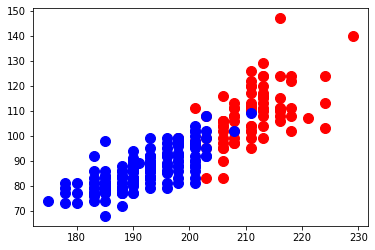

In [ ]:
import matplotlib.pyplot as plt

for val, inp in enumerate(x):
  if y[val] == "C":
    plt.scatter(inp[0], inp[1], s=100, c='r')
  else:
    plt.scatter(inp[0], inp[1], s=100, c='b')

In [ ]:
print(svc.predict([[207, 30]]))

['C']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

C_range = np.logspace(-2, 10, 5)
gamma_range = np.logspace(-9, 3, 5)

param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(x, y)

print(
    "The best parameters are %s with a score of %0.2f" 
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 10.0, 'gamma': 0.001} with a score of 0.98


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.


ValueError: ignored

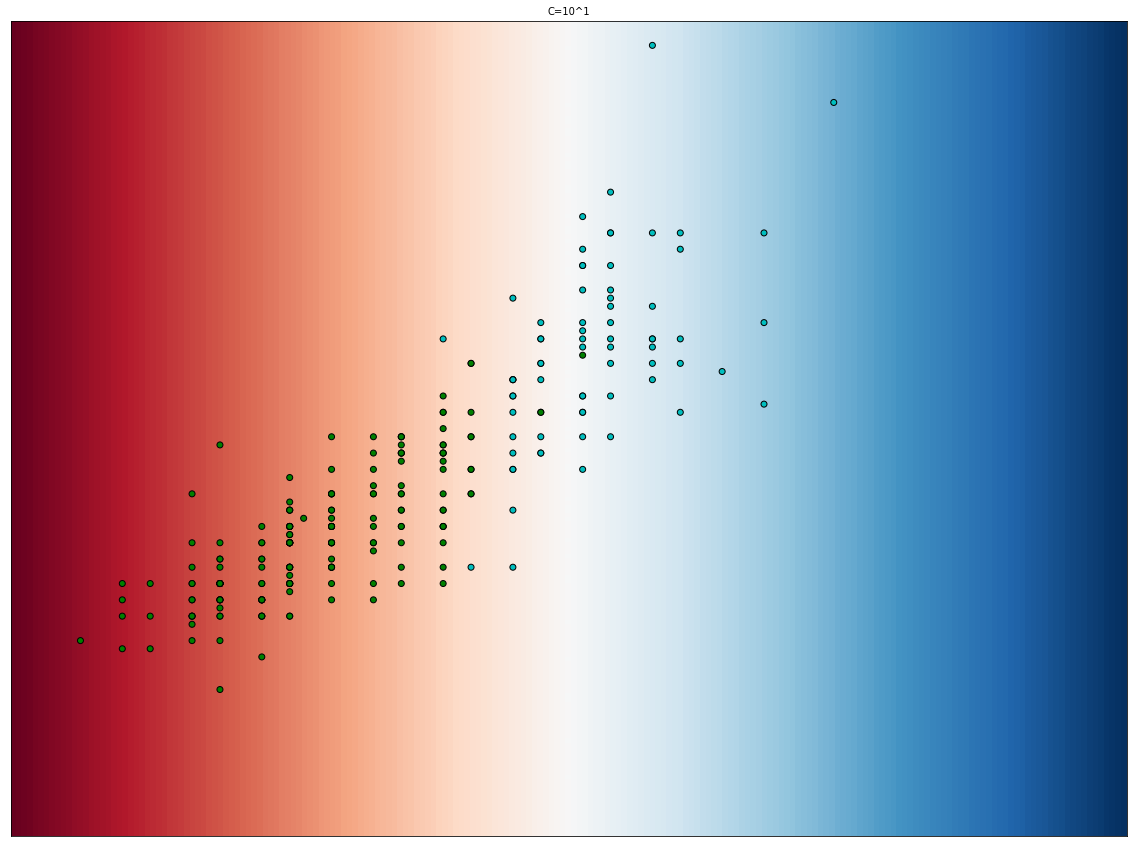

In [ ]:
C_2d_range = [10]
classifiers = []
for C in C_2d_range:
    
    clf = SVC(kernel = 'linear',C=C)
    clf.fit(x, y)
    classifiers.append((C, clf))

plt.figure(figsize=(20, 15))
xx, yy = np.meshgrid(np.linspace(170, 250, 200), np.linspace(50, 150, 200))

for k, (C, clf) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(C_2d_range), k + 1)
    plt.title("C=10^%d" % (np.log10(C)), size="medium")

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdBu_r, edgecolors="k")
    plt.xticks(())
    plt.yticks(())
    plt.axis("tight")

scores = grid.cv_results_["mean_test_score"].reshape(len(C_range))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

C_range = np.logspace(-2, 10, 5)
gamma_range = np.logspace(-9, 3, 5)

param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(x, y)

print(
    "The best parameters are %s with a score of %0.2f" 
    % (grid.best_params_, grid.best_score_)
)

In [ ]:
C_2d_range = [10]
gamma_2d_range = [0.001]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(kernel = 'rbf',C=C, gamma=gamma)
        clf.fit(x, y)
        classifiers.append((C, gamma, clf))

plt.figure(figsize=(20, 20))
xx, yy = np.meshgrid(np.linspace(170, 250, 200), np.linspace(50, 150, 200))

for k, (C, gamma, clf) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)), size="medium")

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdBu_r, edgecolors="k")
    plt.xticks(())
    plt.yticks(())
    plt.axis("tight")

# scores = grid.cv_results_["mean_test_score"].reshape(len(C_range), len(gamma_range))